In [393]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#  Step -1  -- IMPORTING ALL LIBRARIES , READING DATA 

In [394]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

plt.figure(figsize=(5,5))

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [514]:
# reading data model csv
train = pd.read_csv('train.csv')
testData =  pd.read_csv('test.csv')

In [396]:
# Analyzing shape of data
print(train.shape)
print(test.shape)

(8693, 14)
(1772, 17)


In [397]:
# Viewing data
train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Analyzing Data

In [398]:
# studying shape of data
train.shape

(8693, 14)

In [399]:
# studying no of columns in data
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [400]:
# Description of data
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [401]:
# studying infomartion of data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [402]:
# studying size of data
train.size

121702

In [403]:
# studying length of data
len(train)

8693

# Step 2 DATA VISUALIZATION

To visualize data we create two list one having all numerical variables and other having all categorical variables.

In [404]:
# creating numerical variable list
num_Var_List = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']


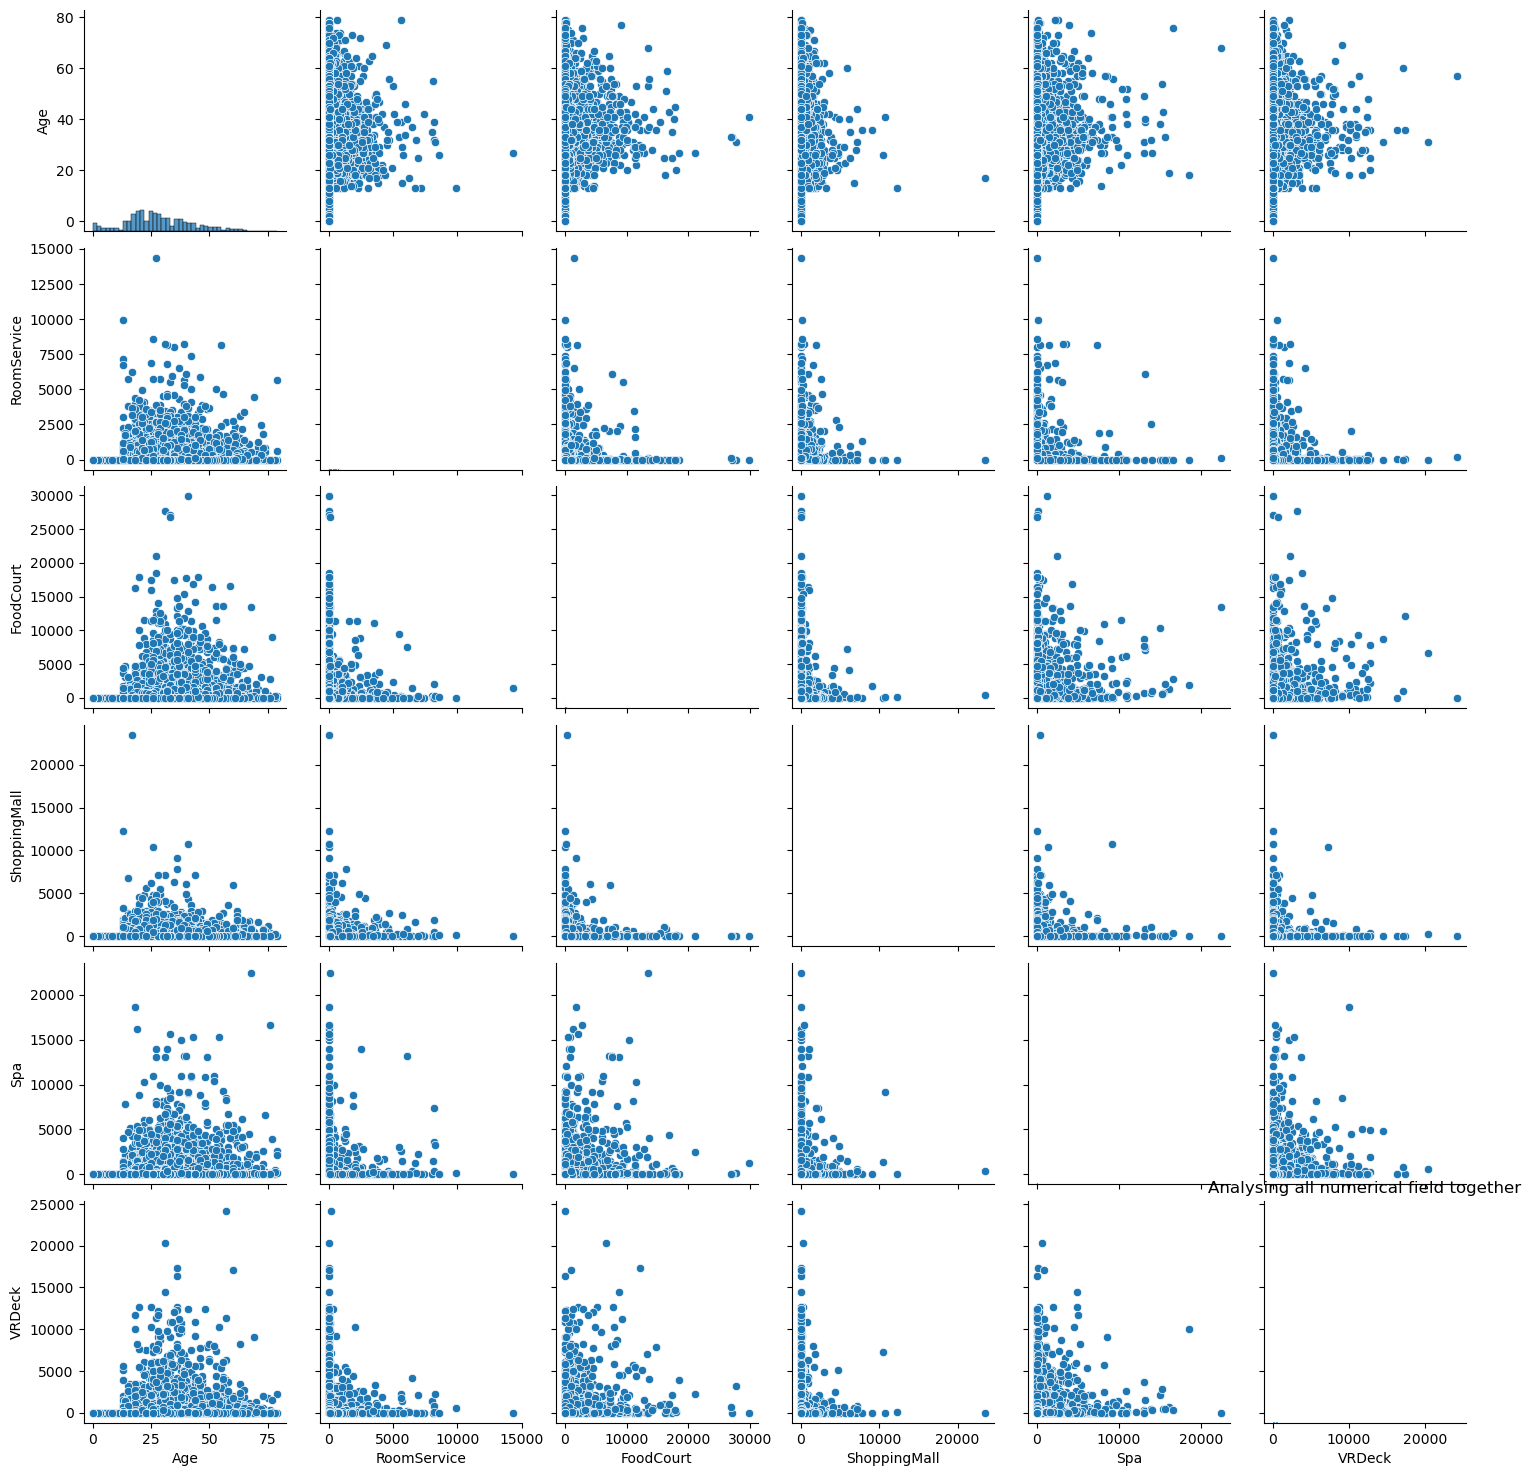

In [405]:
# Visualize nuerical variable using pair plot 
sns.pairplot(train[num_Var_List])
plt.title('Analysing all numerical field together')
plt.show()

In [406]:
# Creating categorical variable list
char_Var_List = ['PassengerId','HomePlanet','CryoSleep','Cabin','Destination','VIP','Name']

Now analyze and visualize each categorical variable with respect to Transported Variable.

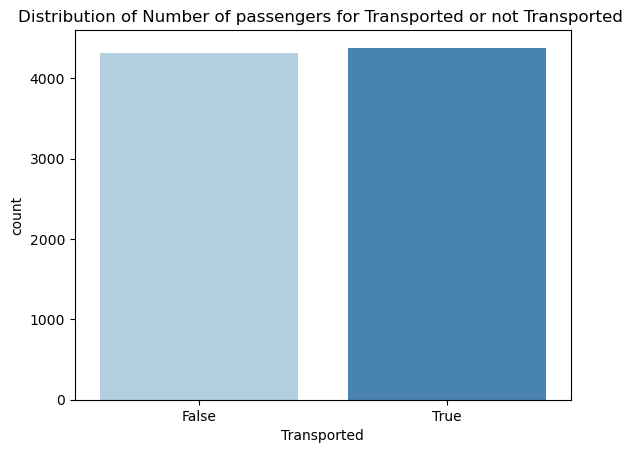

True     4378
False    4315
Name: Transported, dtype: int64

In [407]:
# Transported and not Transported
sns.countplot(x = train.Transported, palette="Blues")
plt.title('Distribution of Number of passengers for Transported or not Transported ')
plt.show()
train.Transported.value_counts()

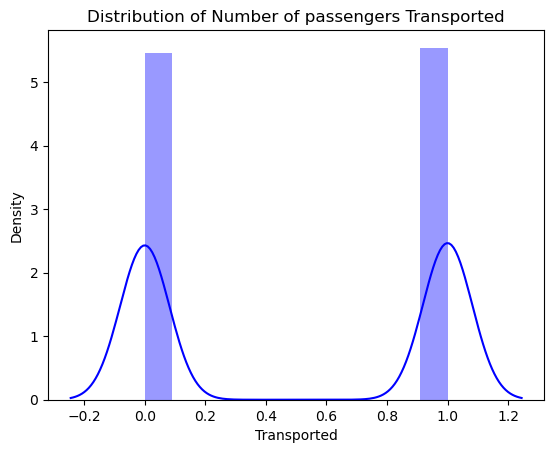

In [408]:
sns.distplot(train.Transported, color= "blue")
plt.title('Distribution of Number of passengers Transported')
plt.show()

From above plots we can see data is Uniformally distributed.

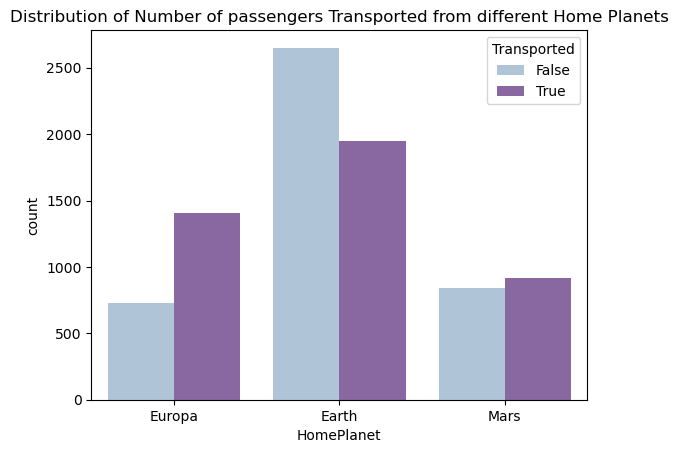

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [409]:
# Home Planet
sns.countplot(x =train.HomePlanet, hue= train.Transported, palette="BuPu")
plt.title('Distribution of Number of passengers Transported from different Home Planets')
plt.show()
train.HomePlanet.value_counts()

Text(0.5, 1.0, 'Distribution of passengers from different home planets')

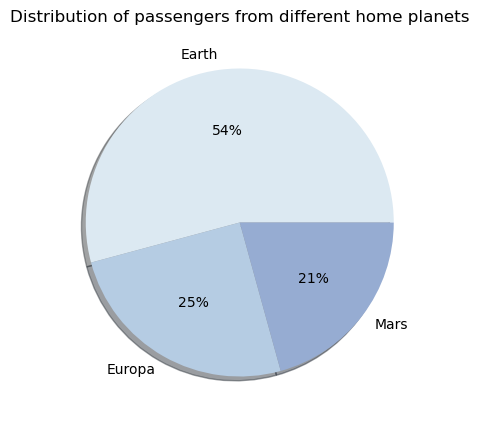

In [410]:
plt.figure(figsize=(8,5))
colors = sns.color_palette('BuPu')
plt.pie(x = train.HomePlanet.value_counts().values, labels=train.HomePlanet.value_counts().index, colors=colors, shadow=True, autopct='%.0f%%',)
plt.title('Distribution of passengers from different home planets')

Counting shows 4602 from Earth, 2131 from Europa and 1759 from Mars.

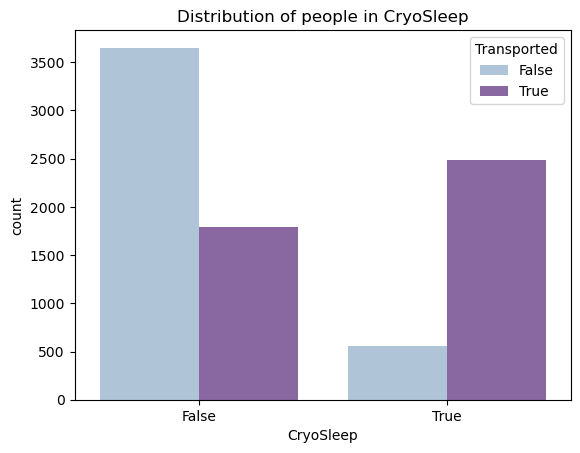

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [411]:
# CryoSleep 
sns.countplot(x=train.CryoSleep,  hue= train.Transported, palette='BuPu')
plt.title('Distribution of people in CryoSleep')
plt.show()
train.CryoSleep.value_counts()

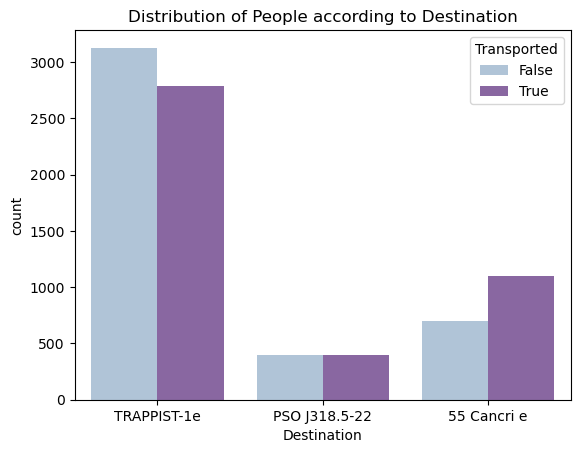

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [412]:
# Destination
sns.countplot(x = train.Destination,  hue= train.Transported, palette='BuPu')
plt.title('Distribution of People according to Destination')
plt.show()
train.Destination.value_counts()

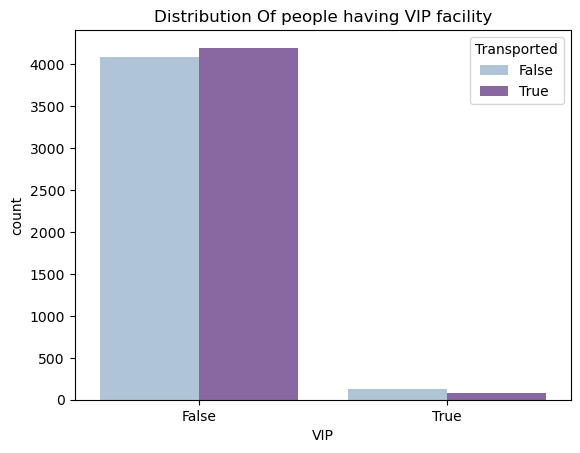

False    8291
True      199
Name: VIP, dtype: int64

In [413]:
# VIP 
sns.countplot(x =train.VIP,  hue= train.Transported, palette='BuPu')
plt.title('Distribution Of people having VIP facility')
plt.show()
train.VIP.value_counts()

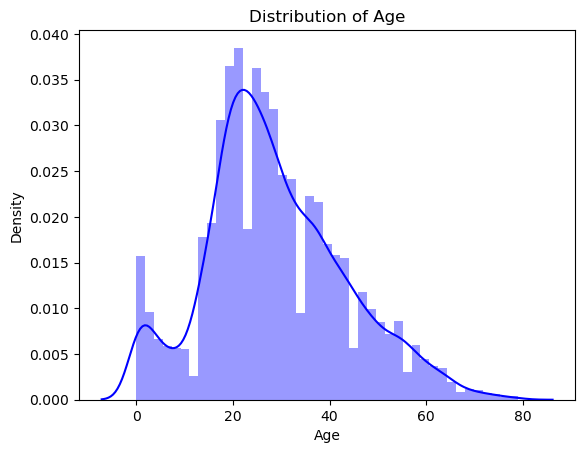

In [414]:
# age
sns.distplot(train.Age, color="b")
plt.title('Distribution of Age')
plt.show()

# Step - 3 Data Preparation

Data Preparation is very important task.Here we check for missing values, null values substitution. Also create dummy variables 
and dropping all unwanted variable here which are not further needed for our analysis.

In [415]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [416]:
# checking for all null values in complete train set
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [417]:
# dropping all NaN and Inf records as it will be very difficult to perform Regression on it in future.
for i in train:
    train = train[~train[i].isnull()]

In [418]:
# checking for null
train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [419]:
# creating two variables from PassengerId haing Group Number and Id
GroupNo =[]
Id_Within_Group=[]

for i in train['PassengerId']:
    s = str(i).split('_')
    GroupNo.append(s[0])
    Id_Within_Group.append(s[1])
    
print(len(GroupNo)) 
print(len(Id_Within_Group)) 

6606
6606


In [420]:
# Creating Dataframe
Group = pd.DataFrame(GroupNo)
Group.columns = ['GroupNo']
Id = pd.DataFrame(Id_Within_Group)
Id.columns = ['Id']

In [421]:
# concat dataframe with train dataset
train = pd.concat([train ,Group],axis =1 )
train = pd.concat([train ,Id],axis =1 )

In [422]:
# dropping PassengerId as we have two new rows having group and Id details ,which is present earlier in PassengerId
train.drop('PassengerId',axis =1,inplace = True)

In [423]:
# List of variables to map

varlist =  ['CryoSleep', 'VIP', 'Transported']

# Defining the map function
def binary_map(x):
    return x.map({True: 1, False: 0})

# Applying the function to the train list
train[varlist] = train[varlist].apply(binary_map)

In [424]:
# create dummies for HomePlanet
home = pd.get_dummies(train['HomePlanet'])

<H5>
Earth - <b>100</b><br/>
Europa - <b>010</b><br/>
Mars - <b>001</b><br/>
If we delete Earth then ,if both Europa and Mars are 0 then it will be Earth.Using a concept of n level requires (n-1) dummies.</H5>

In [425]:
# dropping first row from dummy table
home = pd.get_dummies(train['HomePlanet'] , drop_first = True)
# on concat with train
train = pd.concat([train,home],axis = 1)

In [426]:
# Dropping HomePlanet
train.drop('HomePlanet' , axis =1 ,inplace =True)

In [427]:
# create dummies for Destination
dest = pd.get_dummies(train['Destination'])

In [428]:
# dropping first row from dummy table
dest = pd.get_dummies(train['Destination'] , drop_first =True)
# on concat with train
train = pd.concat([train,dest],axis = 1)

In [429]:
# Dropping Destination
train.drop('Destination' , axis =1 ,inplace =True)

In [430]:
# Creating list and splitting Cabin into Deck,Num and Side
deck =[]
num=[]
side =[]

for i in train['Cabin']:
    s = str(i).split('/')
    deck.append(s[0])
    num.append(s[1:-1])
    side.append(s[2:])
       
print(len(deck)) 
print(len(num)) 
print(len(side)) 

8213
8213
8213


In [431]:
# creating a Dataframe for Deck , Num , Side
deck = pd.DataFrame(deck)
deck.columns = ['Deck']
num = pd.DataFrame(num)
num.columns = ['Num']
side = pd.DataFrame(side)
side.columns = ['Side']

In [432]:
# Concat Deck,Num,Side with Train
train = pd.concat([train ,deck],axis =1 )
train = pd.concat([train ,num],axis =1 )
train = pd.concat([train ,side],axis =1 )

In [433]:
# dropping Cabin
train = train.drop('Cabin',1)

In [434]:
# mapping proper substituted values for Deck Levels 
train['Deck'] = train['Deck'].map({'F':0 ,'E': 1 ,'D' : 2 , 'C' : 3 , 'B' : 4 ,'A' : 5})

In [435]:
# Mapping Side values 
train['Side'] = train['Side'].map({'P' : 0 , 'S' : 1})

In [436]:
train.isnull().sum()

CryoSleep        1972
Age              1972
VIP              1972
RoomService      1972
FoodCourt        1972
ShoppingMall     1972
Spa              1972
VRDeck           1972
Name             1972
Transported      1972
GroupNo          1972
Id               1972
Europa            365
Mars              365
PSO J318.5-22     365
TRAPPIST-1e       365
Deck             3947
Num              1972
Side             1972
dtype: int64

In [437]:
# dropping all NaN and Inf records as it will be very difficult to perform Regression on it in future.
for i in train:
    train = train[~train[i].isnull()]

In [438]:
# Checking finally for null values
train.isnull().sum()

CryoSleep        0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name             0
Transported      0
GroupNo          0
Id               0
Europa           0
Mars             0
PSO J318.5-22    0
TRAPPIST-1e      0
Deck             0
Num              0
Side             0
dtype: int64

In [439]:
# Shape of data after dropping all NaN , inf values
train.shape

(3490, 19)

In [440]:
# dropping Unnecessary Variables which were not in use while doing Multiple Liner Regression
train = train.drop('Name',1)

In [441]:
# viewing data
train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupNo,Id,Europa,Mars,PSO J318.5-22,TRAPPIST-1e,Deck,Num,Side
0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0001,01,1.0,0.0,0.0,1.0,4.0,0,0.0
1,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,0002,01,0.0,0.0,0.0,1.0,0.0,0,1.0
2,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0,0003,01,1.0,0.0,0.0,1.0,5.0,0,1.0
3,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0,0003,02,1.0,0.0,0.0,1.0,5.0,0,1.0
4,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,0004,01,0.0,0.0,0.0,1.0,0.0,1,1.0


In [442]:
# Hence Final_Train_Set is a final training set on which we create models.
Final_Train_Set = train

In [443]:
# Creating an object for Scaling
scaler = MinMaxScaler()

In [444]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_Var_List = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

Final_Train_Set[num_Var_List] = scaler.fit_transform(Final_Train_Set[num_Var_List])

In [445]:
Final_Train_Set.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupNo,Id,Europa,Mars,PSO J318.5-22,TRAPPIST-1e,Deck,Num,Side
0,0.0,0.493671,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0001,01,1.0,0.0,0.0,1.0,4.0,0,0.0
1,0.0,0.303797,0.0,0.010988,0.000302,0.002040,0.033084,0.002164,1.0,0002,01,0.0,0.0,0.0,1.0,0.0,0,1.0
2,0.0,0.734177,1.0,0.004335,0.119948,0.000000,0.404664,0.002410,0.0,0003,01,1.0,0.0,0.0,1.0,5.0,0,1.0
3,0.0,0.417722,0.0,0.000000,0.043035,0.030278,0.200615,0.009491,0.0,0003,02,1.0,0.0,0.0,1.0,5.0,0,1.0
4,0.0,0.202532,0.0,0.030544,0.002348,0.012324,0.034048,0.000098,1.0,0004,01,0.0,0.0,0.0,1.0,0.0,1,1.0


In [446]:
# updated train set value info of dtypes
Final_Train_Set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3490 entries, 0 to 6605
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CryoSleep      3490 non-null   float64
 1   Age            3490 non-null   float64
 2   VIP            3490 non-null   float64
 3   RoomService    3490 non-null   float64
 4   FoodCourt      3490 non-null   float64
 5   ShoppingMall   3490 non-null   float64
 6   Spa            3490 non-null   float64
 7   VRDeck         3490 non-null   float64
 8   Transported    3490 non-null   float64
 9   GroupNo        3490 non-null   object 
 10  Id             3490 non-null   object 
 11  Europa         3490 non-null   float64
 12  Mars           3490 non-null   float64
 13  PSO J318.5-22  3490 non-null   float64
 14  TRAPPIST-1e    3490 non-null   float64
 15  Deck           3490 non-null   float64
 16  Num            3490 non-null   object 
 17  Side           3490 non-null   float64
dtypes: float

In [447]:
# Converting values to proper Int values so that we can build models  on the data
for i in Final_Train_Set:
    Final_Train_Set[i].astype(int)
Final_Train_Set['GroupNo'] = Final_Train_Set['GroupNo'].astype(int)   
Final_Train_Set['Id'] = Final_Train_Set['Id'].astype(int)   
Final_Train_Set['Num'] = Final_Train_Set['Num'].astype(int)   

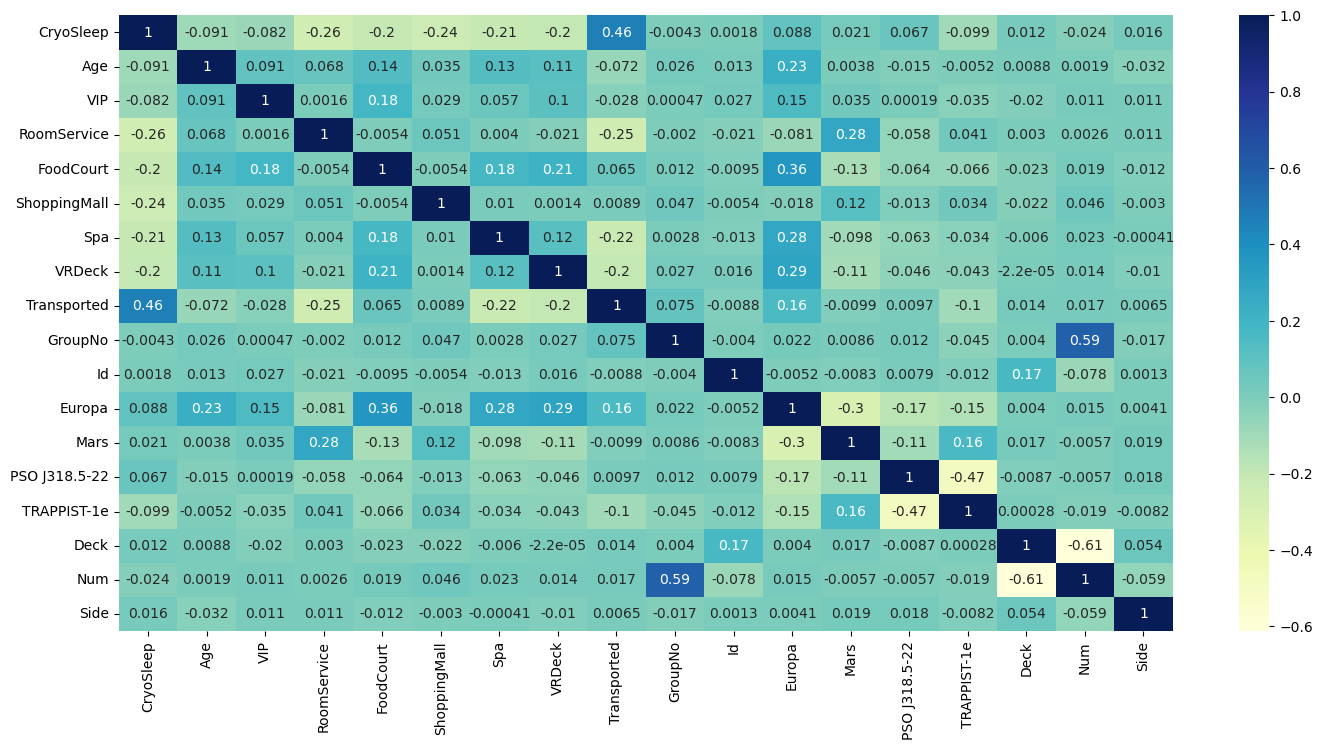

In [448]:
# heatmap to find corr between each of them
plt.figure(figsize=(17,8))
sns.heatmap(Final_Train_Set.corr() , annot = True , cmap = 'YlGnBu')
plt.show()

<H3>Dividing into X and Y set </H3>

In [449]:
#Dividing into X and Y set
y_train = Final_Train_Set.pop('Transported')
X_train = Final_Train_Set

In [450]:
# Checking Shape of data
print(X_train.shape)
print(y_train.shape)

(3490, 17)
(3490,)


In [451]:
# Creating an object for Linear Regression Class
lr=LinearRegression()

<H4> Now Instead of taking one by one Variable we are taking a complete dataset </H4>

In [452]:
# Creating First fitted model
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const            0.390563
CryoSleep        0.386151
Age             -0.135117
VIP             -0.090856
RoomService     -1.202762
FoodCourt        1.424475
ShoppingMall     1.077265
Spa             -1.431811
VRDeck          -1.688901
GroupNo          0.000017
Id              -0.004538
Europa           0.212952
Mars             0.068565
PSO J318.5-22   -0.041583
TRAPPIST-1e     -0.060276
Deck            -0.002526
Num             -0.000035
Side            -0.000715
dtype: float64

In [453]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Transported   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     109.1
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          1.04e-306
Time:                        13:42:37   Log-Likelihood:                -1785.4
No. Observations:                3490   AIC:                             3607.
Df Residuals:                    3472   BIC:                             3718.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3906      0.030     13.102      0.000       0.332       0.449
CryoSleep         0.3862      0.017     22.684      0.000       0.353       0.420
Age              -0.1351      0.039     -3.490      0.000      -0.211      -0.059
VIP              -0.0909      0.048     -1.910      0.056      -0.184       0.002
RoomService      -1.2028      0.113    -10.656      0.000      -1.424      -0.981
FoodCourt         1.4245      0.137     10.435      0.000       1.157       1.692
ShoppingMall      1.0773      0.147      7.329      0.000       0.789       1.365
Spa              -1.4318      0.109    -13.114      0.000      -1.646      -1.218
VRDeck           -1.6889      0.134    -12.644      0.000      -1.951      -1.427
GroupNo        1.693e-05   3.83e-06      4.418      0.000    9.42e-06    2.44e-05
Id               -0.0045      0.007     -0.646      0.518      -0.018       0.009
Europa            0.2130      0.021     10.365      0.000       0.173       0.253
Mars              0.0686      0.019      3.589      0.000       0.031       0.106
PSO J318.5-22    -0.0416      0.029     -1.437      0.151      -0.098       0.015
TRAPPIST-1e      -0.0603      0.018     -3.405      0.001      -0.095      -0.026
Deck             -0.0025      0.006     -0.395      0.693      -0.015       0.010
Num           -3.505e-05   2.46e-05     -1.426      0.154   -8.33e-05    1.32e-05
Side             -0.0007      0.014     -0.052      0.959      -0.028       0.026
==============================================================================
Omnibus:                      274.153   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.200
Skew:                           0.070   Prob(JB):                     9.53e-21
Kurtosis:                       2.216   Cond. No.                     1.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Checking VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

𝑉𝐼𝐹𝑖=11−𝑅𝑖2
 


In [454]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,GroupNo,8.98
15,Num,6.82
1,Age,4.46
14,Deck,4.01
13,TRAPPIST-1e,3.48
9,Id,3.09
10,Europa,2.26
0,CryoSleep,2.06
16,Side,1.93
11,Mars,1.63


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

Dropping the variable and updating the model
As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, <b>Side</b> as it has a very high p-value of <b>0.959</b>. Let's go ahead and drop this variables

In [455]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('Side', 1,)

In [456]:
# Build a Second fitted model
X_train_lm = sm.add_constant(X_train)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [457]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Transported   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     116.0
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          9.50e-308
Time:                        13:42:37   Log-Likelihood:                -1785.4
No. Observations:                3490   AIC:                             3605.
Df Residuals:                    3473   BIC:                             3709.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3902      0.029     13.503      0.000       0.334       0.447
CryoSleep         0.3861      0.017     22.687      0.000       0.353       0.420
Age              -0.1350      0.039     -3.491      0.000      -0.211      -0.059
VIP              -0.0909      0.048     -1.912      0.056      -0.184       0.002
RoomService      -1.2028      0.113    -10.659      0.000      -1.424      -0.982
FoodCourt         1.4245      0.136     10.438      0.000       1.157       1.692
ShoppingMall      1.0773      0.147      7.330      0.000       0.789       1.365
Spa              -1.4318      0.109    -13.116      0.000      -1.646      -1.218
VRDeck           -1.6889      0.134    -12.646      0.000      -1.951      -1.427
GroupNo        1.693e-05   3.83e-06      4.418      0.000    9.42e-06    2.44e-05
Id               -0.0045      0.007     -0.646      0.518      -0.018       0.009
Europa            0.2129      0.021     10.367      0.000       0.173       0.253
Mars              0.0685      0.019      3.589      0.000       0.031       0.106
PSO J318.5-22    -0.0416      0.029     -1.438      0.150      -0.098       0.015
TRAPPIST-1e      -0.0603      0.018     -3.406      0.001      -0.095      -0.026
Deck             -0.0025      0.006     -0.396      0.692      -0.015       0.010
Num           -3.501e-05   2.46e-05     -1.425      0.154   -8.32e-05    1.32e-05
==============================================================================
Omnibus:                      274.165   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.207
Skew:                           0.070   Prob(JB):                     9.49e-21
Kurtosis:                       2.216   Cond. No.                     1.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [458]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,GroupNo,8.97
15,Num,6.81
1,Age,4.44
14,Deck,3.98
13,TRAPPIST-1e,3.40
9,Id,3.07
10,Europa,2.26
0,CryoSleep,2.04
11,Mars,1.63
12,PSO J318.5-22,1.40


Dropping the variable and updating the model
As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, 
<b>Deck</b> as it has a very high p-value of <b>0.692</b>. Lets go ahead and drop this variables

In [459]:
# Dropping highly correlated variables and insignificant variables
X_train = X_train.drop('Deck', 1,)

In [460]:
# Build a Third fitted model
X_train_lm = sm.add_constant(X_train)
lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [461]:
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Transported   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     123.7
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          9.08e-309
Time:                        13:42:37   Log-Likelihood:                -1785.4
No. Observations:                3490   AIC:                             3603.
Df Residuals:                    3474   BIC:                             3701.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3871      0.028     13.915      0.000       0.333       0.442
CryoSleep         0.3863      0.017     22.700      0.000       0.353       0.420
Age              -0.1349      0.039     -3.487      0.000      -0.211      -0.059
VIP              -0.0905      0.048     -1.905      0.057      -0.184       0.003
RoomService      -1.2031      0.113    -10.662      0.000      -1.424      -0.982
FoodCourt         1.4258      0.136     10.451      0.000       1.158       1.693
ShoppingMall      1.0780      0.147      7.337      0.000       0.790       1.366
Spa              -1.4327      0.109    -13.128      0.000      -1.647      -1.219
VRDeck           -1.6884      0.134    -12.645      0.000      -1.950      -1.427
GroupNo        1.607e-05   3.16e-06      5.087      0.000    9.88e-06    2.23e-05
Id               -0.0050      0.007     -0.714      0.475      -0.019       0.009
Europa            0.2128      0.021     10.363      0.000       0.173       0.253
Mars              0.0684      0.019      3.585      0.000       0.031       0.106
PSO J318.5-22    -0.0413      0.029     -1.429      0.153      -0.098       0.015
TRAPPIST-1e      -0.0603      0.018     -3.405      0.001      -0.095      -0.026
Num           -2.765e-05   1.61e-05     -1.723      0.085   -5.91e-05    3.82e-06
==============================================================================
Omnibus:                      274.173   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.240
Skew:                           0.070   Prob(JB):                     9.34e-21
Kurtosis:                       2.216   Cond. No.                     1.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [462]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,GroupNo,5.52
1,Age,4.38
13,TRAPPIST-1e,3.31
14,Num,3.07
9,Id,2.86
10,Europa,2.26
0,CryoSleep,2.03
11,Mars,1.63
12,PSO J318.5-22,1.39
4,FoodCourt,1.34


Dropping the variable and updating the model
As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is,
<b>Id</b> as it has a very high p-value of <b>0.475</b>. Let's go ahead and drop this variables

In [463]:
# dropping Id
X_train = X_train.drop('Id',1)

In [464]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X_train)
lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [465]:
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Transported   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     132.5
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          9.97e-310
Time:                        13:42:37   Log-Likelihood:                -1785.7
No. Observations:                3490   AIC:                             3601.
Df Residuals:                    3475   BIC:                             3694.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3795      0.026     14.760      0.000       0.329       0.430
CryoSleep         0.3863      0.017     22.704      0.000       0.353       0.420
Age              -0.1353      0.039     -3.498      0.000      -0.211      -0.059
VIP              -0.0916      0.048     -1.927      0.054      -0.185       0.002
RoomService      -1.2015      0.113    -10.651      0.000      -1.423      -0.980
FoodCourt         1.4271      0.136     10.463      0.000       1.160       1.695
ShoppingMall      1.0783      0.147      7.340      0.000       0.790       1.366
Spa              -1.4319      0.109    -13.122      0.000      -1.646      -1.218
VRDeck           -1.6900      0.134    -12.659      0.000      -1.952      -1.428
GroupNo        1.595e-05   3.15e-06      5.057      0.000    9.77e-06    2.21e-05
Europa            0.2130      0.021     10.374      0.000       0.173       0.253
Mars              0.0686      0.019      3.590      0.000       0.031       0.106
PSO J318.5-22    -0.0412      0.029     -1.426      0.154      -0.098       0.015
TRAPPIST-1e      -0.0601      0.018     -3.397      0.001      -0.095      -0.025
Num           -2.658e-05    1.6e-05     -1.663      0.096   -5.79e-05    4.75e-06
==============================================================================
Omnibus:                      274.266   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.326
Skew:                           0.071   Prob(JB):                     8.95e-21
Kurtosis:                       2.216   Cond. No.                     1.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [466]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,GroupNo,5.30
1,Age,4.19
12,TRAPPIST-1e,3.10
13,Num,3.05
9,Europa,2.25
0,CryoSleep,2.00
10,Mars,1.63
11,PSO J318.5-22,1.36
4,FoodCourt,1.34
3,RoomService,1.31


Dropping the variable and updating the model
As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, 
<b>PSO J318.5-22</b> as it has a very high p-value of <b>0.154</b>. Let's go ahead and drop this variables

In [467]:
# dropping PSO J318.5-22
X_train = X_train.drop('PSO J318.5-22', 1)

In [468]:
# Build a fifth fitted model
X_train_lm = sm.add_constant(X_train)
lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [469]:
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Transported   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     142.5
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          2.25e-310
Time:                        13:42:37   Log-Likelihood:                -1786.7
No. Observations:                3490   AIC:                             3601.
Df Residuals:                    3476   BIC:                             3688.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3660      0.024     15.307      0.000       0.319       0.413
CryoSleep        0.3850      0.017     22.656      0.000       0.352       0.418
Age             -0.1388      0.039     -3.596      0.000      -0.214      -0.063
VIP             -0.0942      0.047     -1.984      0.047      -0.187      -0.001
RoomService     -1.1977      0.113    -10.619      0.000      -1.419      -0.977
FoodCourt        1.4285      0.136     10.471      0.000       1.161       1.696
ShoppingMall     1.0726      0.147      7.302      0.000       0.785       1.361
Spa             -1.4311      0.109    -13.113      0.000      -1.645      -1.217
VRDeck          -1.6920      0.134    -12.673      0.000      -1.954      -1.430
GroupNo       1.594e-05   3.16e-06      5.052      0.000    9.76e-06    2.21e-05
Europa           0.2212      0.020     11.217      0.000       0.183       0.260
Mars             0.0719      0.019      3.793      0.000       0.035       0.109
TRAPPIST-1e     -0.0475      0.015     -3.098      0.002      -0.078      -0.017
Num          -2.629e-05    1.6e-05     -1.645      0.100   -5.76e-05    5.05e-06
==============================================================================
Omnibus:                      268.496   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.088
Skew:                           0.068   Prob(JB):                     1.66e-20
Kurtosis:                       2.220   Cond. No.                     1.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [470]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,GroupNo,5.16
1,Age,3.86
12,Num,3.05
11,TRAPPIST-1e,2.66
9,Europa,2.10
0,CryoSleep,1.93
10,Mars,1.61
4,FoodCourt,1.34
3,RoomService,1.31
6,Spa,1.24


Dropping the variable and updating the model
As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, 
<b>Num</b> as it has a very high p-value of <b>0.100</b>. Let's go ahead and drop this variables

In [471]:
# dropping Num 
X_train = X_train.drop('Num', 1)

In [472]:
# Build a sixth fitted model
X_train_lm = sm.add_constant(X_train)
lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [473]:
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Transported   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     154.1
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          6.80e-311
Time:                        13:42:37   Log-Likelihood:                -1788.1
No. Observations:                3490   AIC:                             3602.
Df Residuals:                    3477   BIC:                             3682.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3659      0.024     15.298      0.000       0.319       0.413
CryoSleep        0.3853      0.017     22.671      0.000       0.352       0.419
Age             -0.1374      0.039     -3.560      0.000      -0.213      -0.062
VIP             -0.0952      0.047     -2.005      0.045      -0.188      -0.002
RoomService     -1.1987      0.113    -10.625      0.000      -1.420      -0.977
FoodCourt        1.4264      0.136     10.454      0.000       1.159       1.694
ShoppingMall     1.0676      0.147      7.268      0.000       0.780       1.356
Spa             -1.4353      0.109    -13.152      0.000      -1.649      -1.221
VRDeck          -1.6902      0.134    -12.657      0.000      -1.952      -1.428
GroupNo       1.291e-05   2.56e-06      5.042      0.000    7.89e-06    1.79e-05
Europa           0.2213      0.020     11.221      0.000       0.183       0.260
Mars             0.0724      0.019      3.818      0.000       0.035       0.110
TRAPPIST-1e     -0.0478      0.015     -3.114      0.002      -0.078      -0.018
==============================================================================
Omnibus:                      270.229   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.435
Skew:                           0.069   Prob(JB):                     1.40e-20
Kurtosis:                       2.219   Cond. No.                     1.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [474]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Age,3.86
8,GroupNo,3.05
11,TRAPPIST-1e,2.66
9,Europa,2.10
0,CryoSleep,1.93
10,Mars,1.61
4,FoodCourt,1.34
3,RoomService,1.31
6,Spa,1.24
7,VRDeck,1.24


Dropping the variable and updating the model
As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, 
<b>VIP</b> as it has a very high p-value of <b>0.045</b>. Let's go ahead and drop this variables

In [475]:
# dropping Num 
X_train = X_train.drop('VIP', 1)

In [476]:
# Build a seventh fitted model
X_train_lm = sm.add_constant(X_train)
lr_7 = sm.OLS(y_train, X_train_lm).fit()

In [477]:
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Transported   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     167.6
Date:                Thu, 20 Jul 2023   Prob (F-statistic):          3.78e-311
Time:                        13:42:37   Log-Likelihood:                -1790.1
No. Observations:                3490   AIC:                             3604.
Df Residuals:                    3478   BIC:                             3678.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3653      0.024     15.268      0.000       0.318       0.412
CryoSleep        0.3875      0.017     22.843      0.000       0.354       0.421
Age             -0.1403      0.039     -3.635      0.000      -0.216      -0.065
RoomService     -1.1906      0.113    -10.556      0.000      -1.412      -0.969
FoodCourt        1.3953      0.136     10.288      0.000       1.129       1.661
ShoppingMall     1.0668      0.147      7.260      0.000       0.779       1.355
Spa             -1.4322      0.109    -13.119      0.000      -1.646      -1.218
VRDeck          -1.6985      0.134    -12.719      0.000      -1.960      -1.437
GroupNo       1.295e-05   2.56e-06      5.057      0.000    7.93e-06     1.8e-05
Europa           0.2171      0.020     11.066      0.000       0.179       0.256
Mars             0.0686      0.019      3.636      0.000       0.032       0.106
TRAPPIST-1e     -0.0468      0.015     -3.051      0.002      -0.077      -0.017
==============================================================================
Omnibus:                      267.528   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.944
Skew:                           0.069   Prob(JB):                     1.79e-20
Kurtosis:                       2.221   Cond. No.                     1.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [478]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Age,3.85
7,GroupNo,3.05
10,TRAPPIST-1e,2.66
8,Europa,2.08
0,CryoSleep,1.92
9,Mars,1.59
3,FoodCourt,1.32
2,RoomService,1.31
5,Spa,1.24
6,VRDeck,1.24


<H4>
R-Squared measures how much of the dependent variable variation is explained by the independent variables in the model.
Here R Squared Value is 34% . All p-value is less than 0.005 which shows it is significant.</H4>


# Step -7 Residual Analysis

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [479]:
# Predicting value of Seventh model
y_train_Transported = lr_7.predict(X_train_lm)

In [480]:
# Calculating (y_train - y_pred)
res = y_train - y_train_Transported

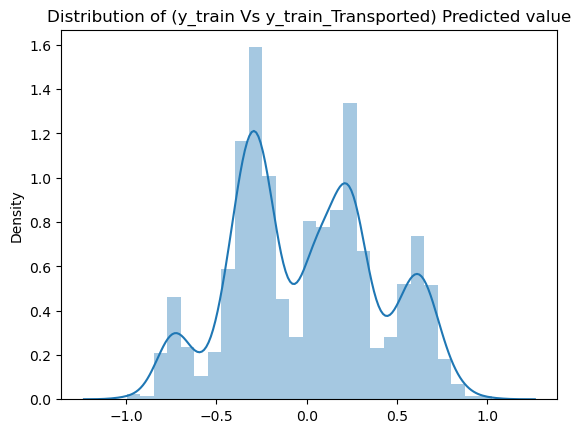

In [481]:
# Distplot showing the distribution of y_train with y-predicted value
sns.distplot(res)
plt.title('Distribution of (y_train Vs y_train_Transported) Predicted value')
plt.show()

Text(0.5, 0, 'Errors')

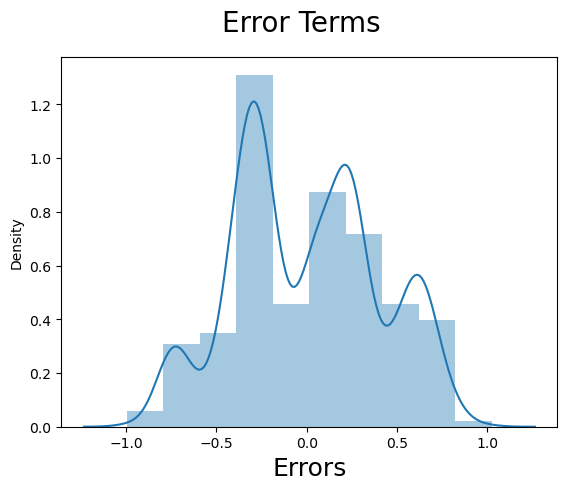

In [482]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_Transported),bins = 10)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)      

<H4> As we can see all Error Terms are normally distributed no major spike as such. </H4>

# Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. Seventh model.

<H3>Applying the scaling on the test sets</H3>

In [515]:
# Storing all test data in testData 
test = testData

In [516]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_Var_List = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

test[num_Var_List] = scaler.fit_transform(test[num_Var_List])

In [517]:
# Viewing test data
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,0.341772,False,0.000000,0.000000,0.00000,0.000000,0.000000,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,0.240506,False,0.000000,0.000356,0.00000,0.142260,0.000000,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,0.392405,False,0.000000,0.000000,0.00000,0.000000,0.000000,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,0.481013,False,0.000000,0.263206,0.00000,0.009121,0.026266,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,0.253165,False,0.000865,0.000000,0.07658,0.000000,0.000000,Brence Harperez


In [518]:
# Studying description of data
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,0.362761,0.018956,0.017389,0.021382,0.015272,0.013951
std,0.179482,0.052478,0.060446,0.067634,0.056298,0.055989
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240506,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.329114,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.468354,0.004582,0.003086,0.003980,0.002520,0.001616
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<H4>.As our testData data is not in the format as we studied it in train model.Hence we make the test data as our train data by 
checking for null ,dropping unwanted variables,proper creation of rows , dummy variables. Then we predict the result.</H4> 

In [519]:
# Checking for null values
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [520]:
# dropping all NaN ,inf values
for i in test:
    test = test[~test[i].isnull()]

In [521]:
# verifying test dataset
test.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

In [522]:
# creating List
GroupNo =[]
Id_Within_Group=[]

for i in test['PassengerId']:
    s = str(i).split('_')
    GroupNo.append(s[0])
    Id_Within_Group.append(s[1])
    
print(len(GroupNo)) 
print(len(Id_Within_Group)) 

3281
3281


In [523]:
# creating Dataframe
Group = pd.DataFrame(GroupNo)
Group.columns = ['GroupNo']
Id = pd.DataFrame(Id_Within_Group)
Id.columns = ['Id']

In [524]:
# concat with test dataset
test = pd.concat([test ,Group],axis =1 )
test = pd.concat([test ,Id],axis =1 )

In [525]:
# reading test data
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,GroupNo,Id
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,0.341772,False,0.000000,0.000000,0.00000,0.000000,0.000000,Nelly Carsoning,0013,01
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,0.240506,False,0.000000,0.000356,0.00000,0.142260,0.000000,Lerome Peckers,0018,01
2,0019_01,Europa,True,C/0/S,55 Cancri e,0.392405,False,0.000000,0.000000,0.00000,0.000000,0.000000,Sabih Unhearfus,0019,01
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,0.481013,False,0.000000,0.263206,0.00000,0.009121,0.026266,Meratz Caltilter,0021,01
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,0.253165,False,0.000865,0.000000,0.07658,0.000000,0.000000,Brence Harperez,0023,01


In [526]:
# dropping PassengerId
test.drop('PassengerId',axis =1,inplace = True)

In [527]:
# List of variables to map

varlist =  ['CryoSleep', 'VIP']

# Defining the map function
def binary_map(x):
    return x.map({True: 1, False: 0})

# Applying the function to the train list
test[varlist] = test[varlist].apply(binary_map)

In [528]:
# create dummies for HomePlanet
home = pd.get_dummies(test['HomePlanet'])

In [529]:
home = pd.get_dummies(test['HomePlanet'] , drop_first = True)

# on concat with test
test = pd.concat([test,home],axis = 1)

# Dropping HomePlanet
test.drop('HomePlanet' , axis =1 ,inplace =True)

In [530]:
# create dummies for Destination
dest = pd.get_dummies(test['Destination'])
dest = pd.get_dummies(test['Destination'] , drop_first =True)
# on concat with test
test = pd.concat([test,dest],axis = 1)
#Dropping Destination
test.drop('Destination' , axis =1 ,inplace =True)


In [531]:
test.head()

,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,GroupNo,Id,Europa,Mars,PSO J318.5-22,TRAPPIST-1e
0,1.0,G/3/S,0.341772,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,Nelly Carsoning,0013,01,0,0,0,1
1,0.0,F/4/S,0.240506,0.0,0.000000,0.000356,0.00000,0.142260,0.000000,Lerome Peckers,0018,01,0,0,0,1
2,1.0,C/0/S,0.392405,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,Sabih Unhearfus,0019,01,1,0,0,0
3,0.0,C/1/S,0.481013,0.0,0.000000,0.263206,0.00000,0.009121,0.026266,Meratz Caltilter,0021,01,1,0,0,1
4,0.0,F/5/S,0.253165,0.0,0.000865,0.000000,0.07658,0.000000,0.000000,Brence Harperez,0023,01,0,0,0,1


In [532]:
# Create List
deck =[]
num=[]
side =[]

for i in test['Cabin']:
    s = str(i).split('/')
    deck.append(s[0])
    num.append(s[1:-1])
    side.append(s[2:])
    
print(len(deck)) 
print(len(num)) 
print(len(side)) 
    

4051
4051
4051


In [533]:
# create dataFrame
deck = pd.DataFrame(deck)
deck.columns = ['Deck']
num = pd.DataFrame(num)
num.columns = ['Num']
side = pd.DataFrame(side)
side.columns = ['Side']

In [534]:
# concat with test
test = pd.concat([test ,deck],axis =1 )
test = pd.concat([test ,num],axis =1 )
test = pd.concat([test ,side],axis =1 )

In [535]:
# dropping Cabin
test = test.drop('Cabin',1)

In [536]:
# Mapping Deck and Side with proper numeric value
test['Deck'] = test['Deck'].map({'F':0 ,'E': 1 ,'D' : 2 , 'C' : 3 , 'B' : 4 ,'A' : 5})
test['Side'] = test['Side'].map({'P' : 0 , 'S' : 1})

In [537]:
# Dropping name 
test = test.drop('Name',1)

In [538]:
# After adding rows again checking for null values
test.isnull().sum()

CryoSleep         940
Age               940
VIP               940
RoomService       940
FoodCourt         940
ShoppingMall      940
Spa               940
VRDeck            940
GroupNo           940
Id                940
Europa            170
Mars              170
PSO J318.5-22     170
TRAPPIST-1e       170
Deck             1883
Num               940
Side              940
dtype: int64

In [539]:
# dropping all NaN ,inf Values
for i in test:
    test = test[~test[i].isnull()]

In [540]:
test.shape

(1772, 17)

In [541]:
# Properly converting values to Int so that we can easily predict the values.
for i in test:
    test[i].astype(int)
test['GroupNo'] = test['GroupNo'].astype(int)   
test['Id'] = test['Id'].astype(int)   
test['Num'] = test['Num'].astype(int)   

In [542]:
# studying test info for dtypes
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1772 entries, 1 to 3278
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CryoSleep      1772 non-null   float64
 1   Age            1772 non-null   float64
 2   VIP            1772 non-null   float64
 3   RoomService    1772 non-null   float64
 4   FoodCourt      1772 non-null   float64
 5   ShoppingMall   1772 non-null   float64
 6   Spa            1772 non-null   float64
 7   VRDeck         1772 non-null   float64
 8   GroupNo        1772 non-null   int32  
 9   Id             1772 non-null   int32  
 10  Europa         1772 non-null   float64
 11  Mars           1772 non-null   float64
 12  PSO J318.5-22  1772 non-null   float64
 13  TRAPPIST-1e    1772 non-null   float64
 14  Deck           1772 non-null   float64
 15  Num            1772 non-null   int32  
 16  Side           1772 non-null   float64
dtypes: float64(14), int32(3)
memory usage: 228.4 KB


<H4> As our data preparation on test data is done ,now we create a X test variable , on which we do further analysis.</H4>

In [543]:
# Creating X_test variable
X_test = test

In [544]:
# Adding constant variable to test dataframe
X_test_const = sm.add_constant(X_test)

In [545]:
# Creating X_test_const dataframe by dropping variables from X_test_const

X_test_const = X_test_const.drop(["Side", "Deck", "Id","Num","PSO J318.5-22","VIP"], axis = 1)

In [513]:
X_test_const.head()

,const,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupNo,Europa,Mars,TRAPPIST-1e
1,1.0,0.0,0.240506,0.0,0.000000,0.000356,0.000000,0.142260,0.000000,18,0.0,0.0,1.0
2,1.0,1.0,0.392405,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,19,1.0,0.0,0.0
3,1.0,0.0,0.481013,0.0,0.000000,0.263206,0.000000,0.009121,0.026266,21,1.0,0.0,1.0
4,1.0,0.0,0.253165,0.0,0.000865,0.000000,0.076580,0.000000,0.000000,23,0.0,0.0,1.0
5,1.0,0.0,0.392405,0.0,0.000000,0.063902,0.031717,0.005694,0.002694,27,0.0,0.0,1.0


In [546]:
# Making predictions using the seventh model
y_pred = lr_7.predict(X_test_const)

In [547]:
#predicted Transported for test data
X_test_const['Transported']=lr_7.predict(X_test_const)


In [548]:
X_test_const['Transported'] = X_test_const['Transported'].apply(lambda x : True if x <= 1 else False)

In [549]:
X_test_const['Transported']

1        True
2        True
3        True
4        True
5        True
        ...  
3273     True
3274    False
3275     True
3277     True
3278     True
Name: Transported, Length: 1772, dtype: bool

In [550]:
X_test_const.head()

,const,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupNo,Europa,Mars,TRAPPIST-1e,Transported
1,1.0,0.0,0.240506,0.000000,0.000356,0.000000,0.142260,0.000000,18,0.0,0.0,1.0,True
2,1.0,1.0,0.392405,0.000000,0.000000,0.000000,0.000000,0.000000,19,1.0,0.0,0.0,True
3,1.0,0.0,0.481013,0.000000,0.263206,0.000000,0.009121,0.026266,21,1.0,0.0,1.0,True
4,1.0,0.0,0.253165,0.000865,0.000000,0.076580,0.000000,0.000000,23,0.0,0.0,1.0,True
5,1.0,0.0,0.392405,0.000000,0.063902,0.031717,0.005694,0.002694,27,0.0,0.0,1.0,True


In [554]:
# calculating R -squared value
mse = mean_squared_error(X_test_const.Transported, y_pred)
r_squared = r2_score(X_test_const.Transported, y_pred)
print(mse)
print(r_squared)

0.33379315015417765
-11.173114411076837


Let's now plot the graph for actual versus predicted values.

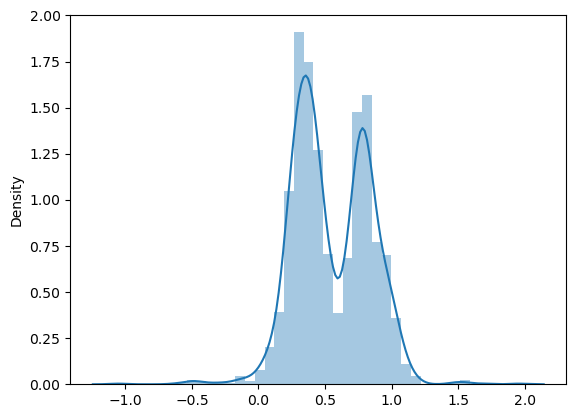

In [128]:
# plotting a graph 
sns.distplot(y_pred)
plt.show()

<H4>Overall train and test have a low fit using Multiple Regression Model.Having R-squared of 34%.</H4>

# Submission Data

In [602]:
# creating a data frame having PassengerId and Transported values
sub = pd.DataFrame({'PassengerId':testData['PassengerId'],'Transported': X_test_const['Transported']})
# creating CSV
sub.to_csv('submission.csv', index=False)

In [603]:
subb = pd.read_csv('submission.csv')

In [604]:
# Studying shape
subb.shape

(4277, 2)

In [612]:
subb.isnull().value_counts()

PassengerId  Transported
False        True           2505
             False          1772
dtype: int64

All True is 1 and all 0 is False i,e NaN

In [607]:
subb.head(20)

,PassengerId,Transported
0,0013_01,NaN
1,0018_01,True
2,0019_01,True
3,0021_01,True
4,0023_01,True
5,0027_01,True
6,0029_01,NaN
7,0032_01,True
8,0032_02,True
9,0033_01,True


In [610]:
subb['Transported'].value_counts()

True     1722
False      50
Name: Transported, dtype: int64